<a href="https://colab.research.google.com/github/MasterMSTC/IPTC_DeepLearning/blob/master/IPTC_GoogleColab_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning LAB
## *ETSIT - UPM*
---

## <font color=FF4455>Google colab Intro to how to read / write files</font>
# OSA example
### See more info at [Google Colab: accessing external data] (https://colab.research.google.com/



* # Import files from your local system (your laptop...)



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Info_BDApnea_QuironMalaga.xlsx to Info_BDApnea_QuironMalaga.xlsx
User uploaded file "Info_BDApnea_QuironMalaga.xlsx" with length 101826 bytes


## Where is the uploaded file?

In [3]:
ls

Info_BDApnea_QuironMalaga.xlsx  sample_data/


In [4]:
pwd

'/content'

## Read an Excel file: WHAT IS PANDAS?

[Explore Pandas, What is a DataFrame?](https://pandas.pydata.org/)

In [5]:
import pandas as pd

data = pd.read_excel("Info_BDApnea_QuironMalaga.xlsx", sheet_name='Hoja1')

#data = pd.read_excel("Info_BDApnea_QuironMalaga.xlsx")

In [6]:
data.head(5)

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,Peso,Talla,IMC,Edad,PerCervical,Fumador,Roncador,Enfermedades,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,82,168.0,-1.0,39.0,-1.0,ns,ns,Septo_Nasal_Desviado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,119,174.0,-1.0,56.0,48.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,-1,-1.0,-1.0,46.0,43.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,78,168.0,-1.0,39.0,42.0,no,ns,Hiperactividad_bronquial,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,80,173.0,-1.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso               object
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

# ¿Why Peso (Weight) is an object?

In [8]:
data[557:561]['Peso']

557                   94
558                   88
559    No quiere saberlo
560                   75
Name: Peso, dtype: object

## So far:
* ### The Excel file has many rows empty
* ### There are two "texts" in the Filed 'Peso'

# <font color= red>Perhaps it is easy to correct the Excel file</font>
* ## As you can see in the Excel, you can add -1 in those to field to label NA values 

# Now upload Info_BDApnea_QuironMalaga_rev1.xlsx

In [9]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Info_BDApnea_QuironMalaga_rev1.xlsx to Info_BDApnea_QuironMalaga_rev1.xlsx
User uploaded file "Info_BDApnea_QuironMalaga_rev1.xlsx" with length 98568 bytes


### Now chech the data frame

In [10]:
data = pd.read_excel("Info_BDApnea_QuironMalaga_rev1.xlsx", sheet_name='Hoja1')

data.dtypes

Patient            object
Comentarios        object
Audios tumbado     object
Fotos              object
Audio fs KHz       object
Gender             object
EPWORTH            object
IAH               float64
IAH Supino         object
IAH Lateral        object
Peso              float64
Talla             float64
IMC               float64
Edad              float64
PerCervical       float64
Fumador            object
Roncador           object
Enfermedades       object
Sala/Ruidos        object
Imagen             object
Dialecto           object
DIST EXT OJOS     float64
DIST BARB-LOB      object
Cansancio          object
Concentrarse       object
PerdRespNoche      object
HiperT            float64
EstHOSP           float64
dtype: object

### ...create a data frame with only:


*   Patient
*   Gender
*   IAH
*   Weight
*   Height
*   Age
*   Cervical



In [11]:
OSA_df = data[['Patient','Gender','IAH','Peso','Talla','Edad','PerCervical']]

## ... change the columns names...

In [12]:
OSA_df.columns = ['Patient','Gender','IAH','Weight','Height','Age','Cervical']


In [13]:
OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
2,P0003,hombre,56.0,-1.0,-1.0,46.0,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


## Use pandas describe() method to see some basic statistics of the data frame
## .... and discover .... what?

In [16]:
OSA_df.describe()

,IAH,Weight,Height,Age,Cervical
count,649.000000,676.000000,677.000000,678.000000,678.000000
mean,20.364653,87.665680,171.144756,49.280236,40.188053
std,18.692784,18.542861,11.661385,12.851542,5.746654
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.300000,75.000000,165.000000,40.000000,38.000000
50%,14.200000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,199.000000,88.000000,53.000000


## These <font color=red> -1 </font> values are NA !! so we can drop them .... or what? DISCUSS ABOUT THIS 

In [17]:
import numpy as np

OSA_df = OSA_df.replace(-1.0,np.NaN)

In [18]:
OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0001,hombre,71.0,82.0,168.0,39.0,NaN
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
2,P0003,hombre,56.0,NaN,NaN,46.0,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
680,P0681,hombre,NaN,94.0,177.0,44.0,44.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


## Visualize NA

[A library to visualize NA](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

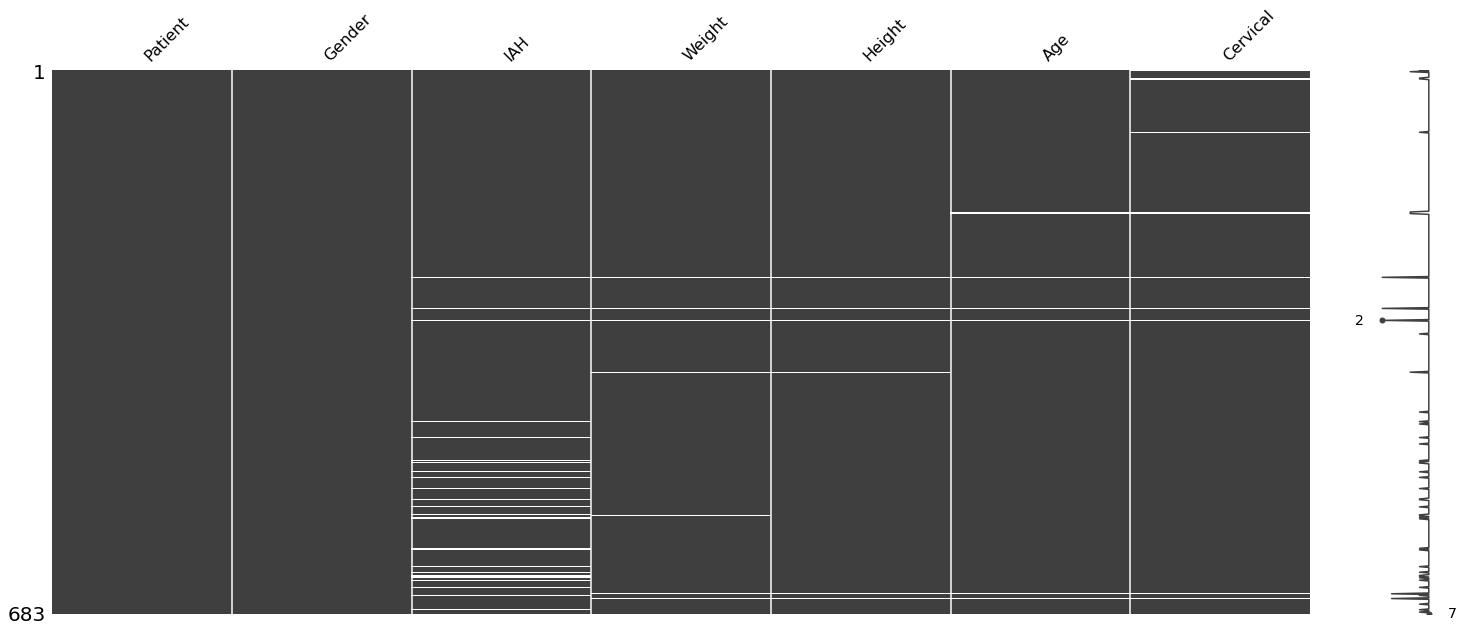

In [19]:
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

# Visualize missing values as a matrix 
msno.matrix(OSA_df)

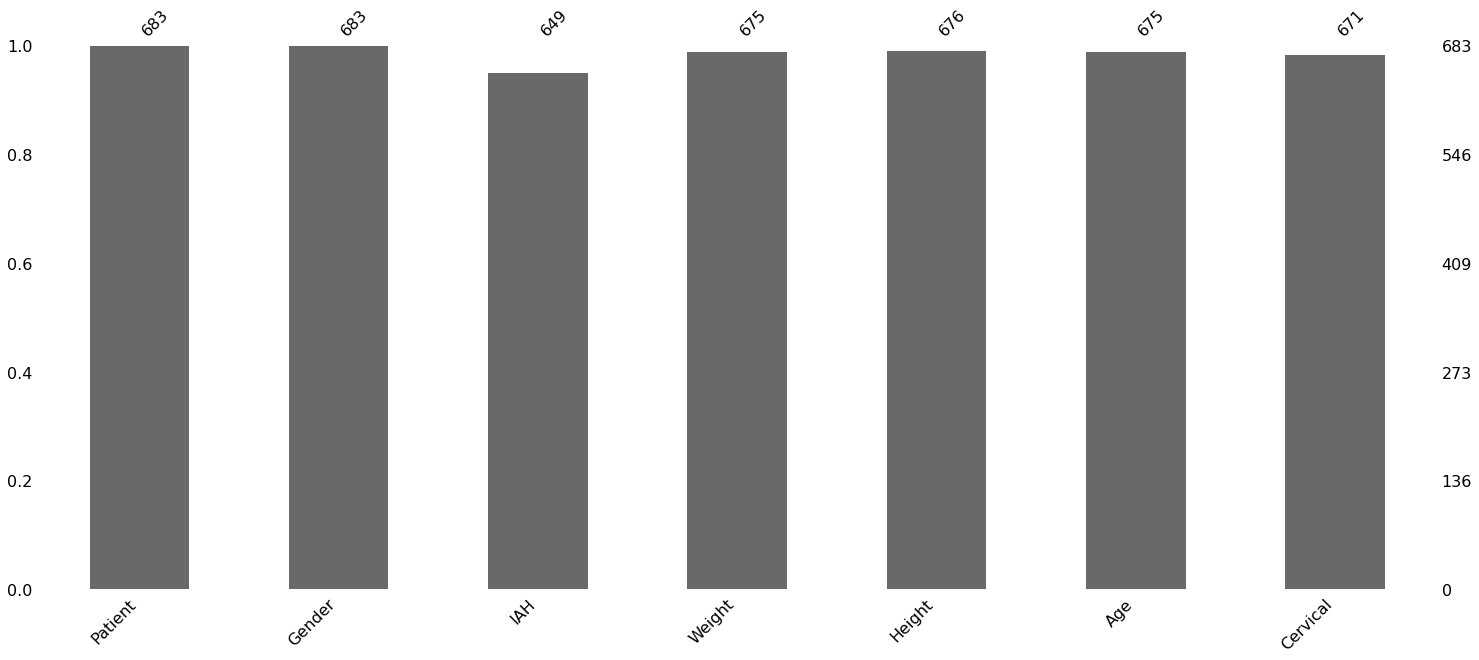

In [20]:
msno.bar(OSA_df)

## We will drop NA 

In [21]:
OSA_df = OSA_df.dropna()

OSA_df

,Patient,Gender,IAH,Weight,Height,Age,Cervical
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0
...,...,...,...,...,...,...,...
676,P0677,mujer,36.3,82.0,165.0,64.0,39.0
678,P0679,hombre,9.2,105.0,180.0,35.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,42.0
681,P0682,mujer,5.4,66.0,164.0,57.0,35.0


In [22]:
OSA_df.describe()

,IAH,Weight,Height,Age,Cervical
count,637.000000,637.000000,637.000000,637.000000,637.000000
mean,20.392716,87.733124,171.284144,49.497645,40.636578
std,18.596944,18.356730,9.558128,12.386418,3.957542
min,0.000000,45.000000,144.000000,20.000000,30.000000
25%,6.400000,75.000000,165.000000,40.000000,38.000000
50%,14.400000,86.000000,171.000000,49.000000,41.000000
75%,30.000000,98.000000,178.000000,59.000000,43.000000
max,108.600000,165.000000,197.000000,88.000000,53.000000


# Finally SAVE the data frame into an Excel : OSA_DB_UPM.xlsx


In [23]:
OSA_df.to_excel('OSA_DB_UPM.xlsx', sheet_name='Hoja1', index = False)

# Download the Excel to our local system

In [24]:

files.download('OSA_DB_UPM.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# .... now is time to do some exploratory analysis....